In [117]:
import pandas as pd
import requests
from scrapy.http import TextResponse
import time
import numpy as np
import re
from textblob import TextBlob, Word #???
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

https://www.nltk.org/

### Books_to_scrape

In [6]:
url="http://books.toscrape.com/"
page=requests.get(url)
response=TextResponse(url=page.url, body=page.text,encoding="utf-8")
prices=response.xpath('//p[@class="price_color"]/text()').extract()

In [8]:
#regular expressions - re() can be used to extract only numbers (to avoid further complex calculations)
response.xpath('//p[@class="price_color"]/text()').re("\d.*\d")

['51.77',
 '53.74',
 '50.10',
 '47.82',
 '54.23',
 '22.65',
 '33.34',
 '17.93',
 '22.60',
 '52.15',
 '13.99',
 '20.66',
 '17.46',
 '52.29',
 '35.02',
 '57.25',
 '23.88',
 '37.59',
 '51.33',
 '45.17']

In [11]:
response.css("p[Class='star-rating Three']::attr(class)").extract() #this is a repetitive approach not advised to use

['star-rating Three', 'star-rating Three', 'star-rating Three']

In [14]:
#pseudochracters can be used like *
# * contains an expression that will follow
#^= starts with an expression that will follow
response.css("p[class*='star-rating']::attr(class)").extract()
response.css("p[class^='star-rating']::attr(class)").extract()

['star-rating Three',
 'star-rating One',
 'star-rating One',
 'star-rating Four',
 'star-rating Five',
 'star-rating One',
 'star-rating Four',
 'star-rating Three',
 'star-rating Four',
 'star-rating One',
 'star-rating Two',
 'star-rating Four',
 'star-rating Five',
 'star-rating Five',
 'star-rating Five',
 'star-rating Three',
 'star-rating One',
 'star-rating One',
 'star-rating Two',
 'star-rating Two']

https://devhints.io/xpath useful link to help with regex

### IMDb film scrapping

In [78]:
url2="https://www.imdb.com/chart/top/"
page2=requests.get(url2)
response2=TextResponse(url=page2.url, body=page2.text,encoding="utf-8")
films=response2.css("td[class='titleColumn']>a::text").extract()
films[0:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Godfather: Part II',
 'The Dark Knight',
 '12 Angry Men']

In [73]:
ratings=response2.css("td[class='ratingColumn imdbRating']>strong::text").extract()
ratings[0:5]

['9.2', '9.2', '9.0', '9.0', '8.9']

In [74]:
years=response2.css('td[class="titleColumn"]>span::text').re("\d+")
years[0:5]

['1994', '1972', '1974', '2008', '1957']

In [75]:
href=response2.css('td[class="titleColumn"]>a::attr(href)').extract()
href[0:5]

['/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0071562/',
 '/title/tt0468569/',
 '/title/tt0050083/']

In [76]:
rate=response2.css('td[class="ratingColumn imdbRating"]>strong::text').extract()
rate[0:5]

['9.2', '9.2', '9.0', '9.0', '8.9']

In [71]:
#creating dataframe using pd
df=pd.DataFrame(list(zip(np.array(years).astype(np.float),films,np.array(ratings).astype(np.float))), 
                     columns=("years","films","ratings"))
df.head()

,years,films,ratings
0,1994.0,The Shawshank Redemption,9.2
1,1972.0,The Godfather,9.2
2,1974.0,The Godfather: Part II,9.0
3,2008.0,The Dark Knight,9.0
4,1957.0,12 Angry Men,8.9


In [53]:
#selecting films that are produced before 1990
df_before_1990=df[df.years<=1990]
df_before_1990.sort_values(by="ratings", ascending=False).head() #sort by highest rating

,years,films,ratings
1,1972.0,The Godfather,9.2
2,1974.0,The Godfather: Part II,9.0
4,1957.0,12 Angry Men,8.9
8,1966.0,"Il buono, il brutto, il cattivo",8.8
13,1980.0,Star Wars: Episode V - The Empire Strikes Back,8.7


In [70]:
#another way of saving the scraped info as dataframe
#saving data in movie dictionary
movie_dict={"name":films, "year":years, "url":href, "rating":ratings}

#saving as dataframe
movie_df=pd.DataFrame(movie_dict)

movie_df.head()

,name,year,url,rating
0,The Shawshank Redemption,1994,/title/tt0111161/,9.2
1,The Godfather,1972,/title/tt0068646/,9.2
2,The Godfather: Part II,1974,/title/tt0071562/,9.0
3,The Dark Knight,2008,/title/tt0468569/,9.0
4,12 Angry Men,1957,/title/tt0050083/,8.9


,name,year,url,rating
0,The Shawshank Redemption,1994,/title/tt0111161/,9.2
1,The Godfather,1972,/title/tt0068646/,9.2
2,The Godfather: Part II,1974,/title/tt0071562/,9.0
3,The Dark Knight,2008,/title/tt0468569/,9.0
4,12 Angry Men,1957,/title/tt0050083/,8.9


In [55]:
#exporting data as Excel
movie_df.to_excel("movie.xlsx")

In [66]:
#the most popular year
df.years.mode().values[0]

1995.0

In [69]:
#mean rating of the films produced during 1995
df.ratings[df.years==df.years.mode().values[0]].mean()

8.275000000000002

# textblob_NLTK

In [81]:
#download if you do this 1st time
nltk.download('popular', halt_on_error=False)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_d

True

In [82]:
slayer_lyrics=""""
Trapped in purgatory
A lifeless object, alive
Awaiting reprisal
Death will be their acquiescence
The sky is turning red
Return to power draws near
Fall into me, the sky's crimson tears
Abolish the rules made of stone
Pierced from below, souls of my treacherous past
Betrayed by many, now ornaments dripping above
Awaiting the hour of reprisal
Your time slips away
Raining blood
From a lacerated sky
Bleeding its horror
Creating my structure now I shall reign in blood
"""

In [96]:
#let's separate words
stayer_blob=TextBlob(slayer_lyrics)
stayer_blob.words

WordList(['Trapped', 'in', 'purgatory', 'A', 'lifeless', 'object', 'alive', 'Awaiting', 'reprisal', 'Death', 'will', 'be', 'their', 'acquiescence', 'The', 'sky', 'is', 'turning', 'red', 'Return', 'to', 'power', 'draws', 'near', 'Fall', 'into', 'me', 'the', 'sky', "'s", 'crimson', 'tears', 'Abolish', 'the', 'rules', 'made', 'of', 'stone', 'Pierced', 'from', 'below', 'souls', 'of', 'my', 'treacherous', 'past', 'Betrayed', 'by', 'many', 'now', 'ornaments', 'dripping', 'above', 'Awaiting', 'the', 'hour', 'of', 'reprisal', 'Your', 'time', 'slips', 'away', 'Raining', 'blood', 'From', 'a', 'lacerated', 'sky', 'Bleeding', 'its', 'horror', 'Creating', 'my', 'structure', 'now', 'I', 'shall', 'reign', 'in', 'blood'])

        The concept of splitting the whole sentence into separate words is called tockenization.

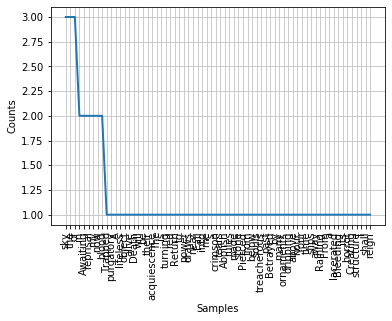

In [89]:
#the most frequent word
freq=nltk.FreqDist(slayer_blob.words)
freq.plot()
plt.show()

In [90]:
w1=Word("studied")
w2=Word("danced")

In [91]:
#print 1st form
w1.lemmatize("v")

'study'

In [92]:
w2.lemmatize("v")

'dance'

In [98]:
#use Word() as str does not have lemmatize() method
for i in stayer_blob.words:
    print(i,Word(i.lower()).lemmatize("v"))

Trapped trap
in in
purgatory purgatory
A a
lifeless lifeless
object object
alive alive
Awaiting await
reprisal reprisal
Death death
will will
be be
their their
acquiescence acquiescence
The the
sky sky
is be
turning turn
red red
Return return
to to
power power
draws draw
near near
Fall fall
into into
me me
the the
sky sky
's 's
crimson crimson
tears tear
Abolish abolish
the the
rules rule
made make
of of
stone stone
Pierced pierce
from from
below below
souls souls
of of
my my
treacherous treacherous
past past
Betrayed betray
by by
many many
now now
ornaments ornament
dripping drip
above above
Awaiting await
the the
hour hour
of of
reprisal reprisal
Your your
time time
slips slip
away away
Raining rain
blood blood
From from
a a
lacerated lacerate
sky sky
Bleeding bleed
its its
horror horror
Creating create
my my
structure structure
now now
I i
shall shall
reign reign
in in
blood blood


In [99]:
#getting all sentences
slayer_blob.sentences

[Sentence(""
 Trapped in purgatory
 A lifeless object, alive
 Awaiting reprisal
 Death will be their acquiescence
 The sky is turning red
 Return to power draws near
 Fall into me, the sky's crimson tears
 Abolish the rules made of stone
 Pierced from below, souls of my treacherous past
 Betrayed by many, now ornaments dripping above
 Awaiting the hour of reprisal
 Your time slips away
 Raining blood
 From a lacerated sky
 Bleeding its horror
 Creating my structure now I shall reign in blood")]

In [100]:
#let's get pos tags (xosqi maser)
#before lemmatizing we can check this to select e.g. only worbs
slayer_blob.tags

[('Trapped', 'VBN'),
 ('in', 'IN'),
 ('purgatory', 'NN'),
 ('A', 'NNP'),
 ('lifeless', 'NN'),
 ('object', 'NN'),
 ('alive', 'JJ'),
 ('Awaiting', 'NNP'),
 ('reprisal', 'NN'),
 ('Death', 'NNP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('their', 'PRP$'),
 ('acquiescence', 'NN'),
 ('The', 'DT'),
 ('sky', 'NN'),
 ('is', 'VBZ'),
 ('turning', 'VBG'),
 ('red', 'JJ'),
 ('Return', 'NNP'),
 ('to', 'TO'),
 ('power', 'NN'),
 ('draws', 'NN'),
 ('near', 'IN'),
 ('Fall', 'NNP'),
 ('into', 'IN'),
 ('me', 'PRP'),
 ('the', 'DT'),
 ('sky', 'NN'),
 ("'s", 'POS'),
 ('crimson', 'JJ'),
 ('tears', 'NNS'),
 ('Abolish', 'VBP'),
 ('the', 'DT'),
 ('rules', 'NNS'),
 ('made', 'VBN'),
 ('of', 'IN'),
 ('stone', 'NN'),
 ('Pierced', 'NNP'),
 ('from', 'IN'),
 ('below', 'IN'),
 ('souls', 'NN'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('treacherous', 'JJ'),
 ('past', 'JJ'),
 ('Betrayed', 'NNP'),
 ('by', 'IN'),
 ('many', 'JJ'),
 ('now', 'RB'),
 ('ornaments', 'VBZ'),
 ('dripping', 'VBG'),
 ('above', 'IN'),
 ('Awaiting', 'VBG'),
 ('the', '

In [101]:
#getting the definitions of the words
w2.definitions

['move in a graceful and rhythmical way',
 'move in a pattern; usually to musical accompaniment; do or perform a dance',
 'skip, leap, or move up and down or sideways']

In [102]:
#w1.define() gives the same
w1.definitions

['consider in detail and subject to an analysis in order to discover essential features or meaning',
 'be a student; follow a course of study; be enrolled at an institute of learning',
 'give careful consideration to',
 'be a student of a certain subject',
 'learn by reading books',
 'think intently and at length, as for spiritual purposes',
 'produced or marked by conscious design or premeditation; ; - V.L.Parrington']

In [103]:
Word("concios").spellcheck()

[('conscious', 0.8192771084337349),
 ('councils', 0.13253012048192772),
 ('concise', 0.04819277108433735)]

    there is 81% prob that we meant concious.

In [110]:
#correcting the spelling (based on the highest probability)
Word("concios").correct()

'conscious'

In [105]:
#getting synonyms
w1.synsets

[Synset('analyze.v.01'),
 Synset('study.v.02'),
 Synset('study.v.03'),
 Synset('learn.v.04'),
 Synset('study.v.05'),
 Synset('study.v.06'),
 Synset('studied.a.01')]

In [108]:
Word("conscious").synsets

[Synset('conscious.s.01'), Synset('conscious.a.02'), Synset('conscious.s.03')]

    no synonym

In [111]:
#to see examples of how the word is used in the sentences
w1.synsets[0].examples()

['analyze a sonnet by Shakespeare',
 'analyze the evidence in a criminal trial',
 'analyze your real motives']

In [112]:
#stemming - keeping the root of the word
stemmer=PorterStemmer()

In [113]:
stemmer.stem("Studied")

'studi'

    sometimes stemming is preferable than lemmatizing (ex. company names from staff.am)

###### the most popular word sometimes in the texts are the, a, an which are stopwords. But if we want to get the most popular word from the text then we need to remove stopwords.

In [125]:
sw=stopwords.words('english')

In [126]:
#the list of all stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [127]:
[i for i in  slayer_blob.words.lower() if i not in sw]

['trapped',
 'purgatory',
 'lifeless',
 'object',
 'alive',
 'awaiting',
 'reprisal',
 'death',
 'acquiescence',
 'sky',
 'turning',
 'red',
 'return',
 'power',
 'draws',
 'near',
 'fall',
 'sky',
 "'s",
 'crimson',
 'tears',
 'abolish',
 'rules',
 'made',
 'stone',
 'pierced',
 'souls',
 'treacherous',
 'past',
 'betrayed',
 'many',
 'ornaments',
 'dripping',
 'awaiting',
 'hour',
 'reprisal',
 'time',
 'slips',
 'away',
 'raining',
 'blood',
 'lacerated',
 'sky',
 'bleeding',
 'horror',
 'creating',
 'structure',
 'shall',
 'reign',
 'blood']

# Menu.am

In [130]:
url_menu="https://www.menu.am/en/"

In [131]:
url_wasabi='https://www.menu.am/en/yerevan/delivery/restaurant/wasabi.html'

In [136]:
page3=requests.get(url_wasabi)
response3=TextResponse(url=page3.url, body=page3.text,encoding="utf-8")
food=response3.css("a[class='title prod_content_a']::text").extract()

In [142]:
food[0:5]

['#500 Philadelphia ',
 '#502 California salmon maki',
 '#501 Philadelphia classic',
 '#503 Smoke Salmon ',
 '#504 Kappa maki']

In [143]:
prices=response3.css("div[class='price']::text").re('\d+')
prices[0:5]

['3700', '4200', '2400', '1850', '900']

In [149]:
url_restaurants='https://www.menu.am/en/yerevan/delivery/restaurant/type.html'
page3=requests.get(url_restaurants)
response3=TextResponse(url=page3.url, body=page3.text,encoding="utf-8")
names_rest=response3.css("div[class='fl list-logo']>a::attr(href)").extract()
names_rest[0:5]

['/en/yerevan/delivery/restaurant/fugu.html',
 '/en/yerevan/delivery/restaurant/12-ktor-pizza.html',
 '/en/yerevan/delivery/restaurant/tsirani.html',
 '/en/yerevan/delivery/restaurant/wasabi.html',
 '/en/yerevan/delivery/restaurant/beijing.html']

In [148]:
restaur_urls=['https://www.menu.am/'+names_rest[i] for i in range(0,len(names_rest))]
restaur_urls[0:5]

['https://www.menu.am//en/yerevan/delivery/restaurant/fugu.html',
 'https://www.menu.am//en/yerevan/delivery/restaurant/12-ktor-pizza.html',
 'https://www.menu.am//en/yerevan/delivery/restaurant/tsirani.html',
 'https://www.menu.am//en/yerevan/delivery/restaurant/wasabi.html',
 'https://www.menu.am//en/yerevan/delivery/restaurant/beijing.html']

    kisaaat